In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload

In [2]:
import numpy as np
import astropy.units as units
import matplotlib.pyplot as plt
import scipy.fft as fft
import scipy.sparse as sparse
import copy

In [3]:
%autoreload 2

In [4]:
import dualpy as dp

In [5]:
N = 2**8 # 2**12
omega_in = 2*np.pi / 100.0
t = np.arange(N)
x = np.sin(omega_in*t) << units.dimensionless_unscaled
# x = np.zeros(N)
# x[2000:2100] = 1.0
x = dp.seed(x, "x", initial_type="sparse")

In [6]:
M = np.ones(shape=[10,20])
S = sparse.csc_matrix(np.eye(10))
type(M.T @ S)

numpy.ndarray

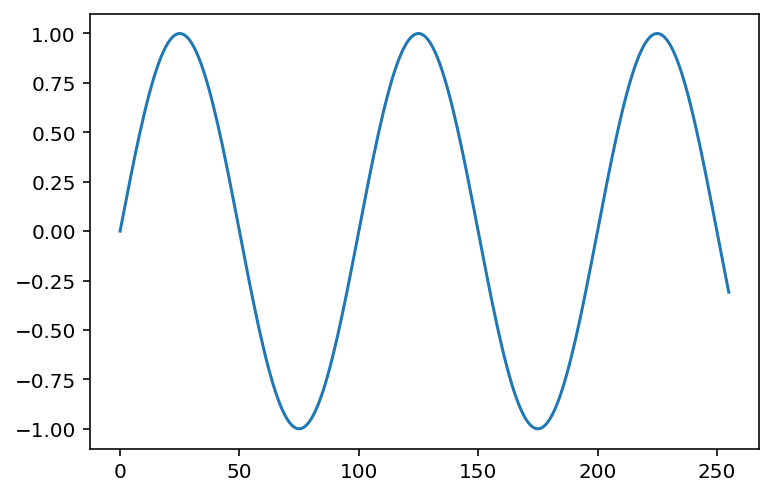

In [7]:
plt.plot(t,x);

In [8]:
NN = int(N/2 + 1)
omega = np.arange(NN)
X = dp.rfft(x)

For: x, -1 has become 0, <class 'dualpy.sparse_jacobians.SparseJacobian'>
Going in, other is (510, 256), Jacobian is Jacobian of type <class 'dualpy.sparse_jacobians.SparseJacobian'>
Dependent shape is (256,) <256>
Independent shape is (256,)<256>
Combined they are (256, 256) <65536>
Dummies are (1,) and (1,)
Units are d<>/d<> = 
data2d is (256, 256) with 256 numbers stored (0.39%)
After rearrangement we have (510, 256) and (256, 256)


ValueError: x and y must have same first dimension, but have shapes (129,) and (510,)

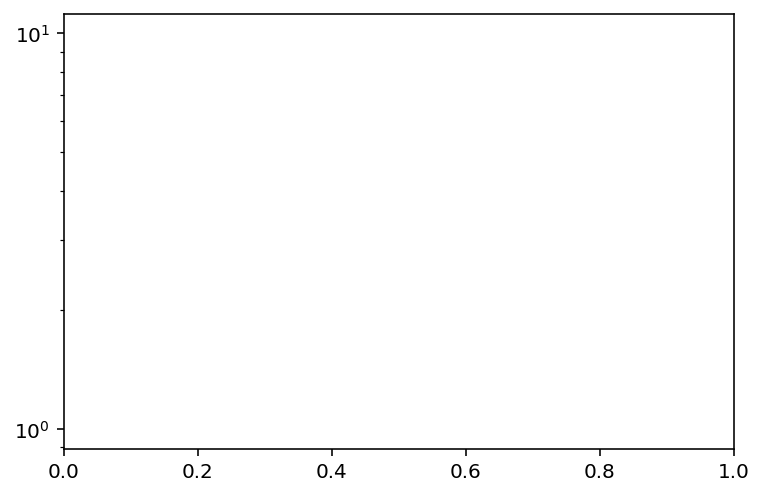

In [9]:
plt.semilogy(omega, np.abs(X));

In [ ]:
j_ana, j_num = dp.compute_jacobians_numerically(dp.rfft, args=[x])

In [ ]:
r_ana = np.abs(j_ana.jacobians["x"].todensearray()).value
r_num = np.abs(j_num.jacobians["x"].todensearray()).value
theta_ana = np.angle(j_ana.jacobians["x"].todensearray()).value
theta_num = np.angle(j_num.jacobians["x"].todensearray()).value

In [ ]:
fig, axes = plt.subplots(2)
axes[0].imshow(theta_ana)
axes[1].imshow(theta_num)

In [ ]:
delta = theta_ana - theta_num
delta = np.where(delta < -6, delta+2*np.pi, delta)

In [ ]:
plt.imshow(delta);
plt.colorbar()

In [ ]:
print(list(range(1,5)))

In [ ]:
print(sum([[1,2],[3,4]]))